# Importing Libraries

                                                            emotion Recognition 

                                                                14 Jul 2025

                                                              shiva chaudhary

I am going to build a audio emotion detection classifier. 

Speech Emotion detection (SER) is an act of attempting to recognize female emotion and affective states from speech. 

I plan to create a speech and emotion recognition of harsh words, screaming, crying, stress signals and asking for help signs. so, my model will predict if the person is showing such signs. This is a prototype model and I think i will not get enough time to tuning of hyperparameters. It needs to be done for better model accuracy and classfication. 

In [5]:
import pandas as pd 
import numpy as np

# for creating paths 
import os 
import sys

    # librosa is python library for analyzing audio and music. 
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

    # to play the audio files
from IPython.display import Audio 

import keras 
    
    # it autommatically lowers learning rate if models stop improving 
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential 
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
    
    #ignoring. warningns
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [10]:
# Data prepration 
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
torronto = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data"

            # 1. Ravdess dataframe 
from the official website of Ravdess 
- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

so here's example of an audio filename. 03-01-01-01-01-01-01.wav. This means the meta data for the audio is 
- audio-only(03)
- speech(01)
- neutral(01)
- normal(01)
- statement[0](01)
- repetation(01)
- actor(01)

In [11]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:

    # as i need only female voice only 
    female_actor = int(dir.split('_')[1])
    # as their are 24 different actors in our previous directory
    # we need to extract files for each actor.
    if female_actor % 2 == 0:
    
        actor = os.listdir(Ravdess + dir)
        for file in actor:
            part = file.split('.')[0]
            part = part.split('-')
            # third part in each file represents the emotion associated to that file.
            file_emotion.append(int(part[2]))
            file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

    # Preprocessing left for torronto and crema-d dataset 
this is left to train and this is only for prototype so, i plan to preprocess this datas. 

In [12]:
# torronto_list = os.listdir(torronto)

# file_emotion = []
# file_path = []

# for files in torronto_list:
#     part = files.split('_')[1][0]
    
#     if part == 'f' or part == 'F':
#         file_emotion.append('fear')
#     elif part == 'a':
#         file_emotion.append('angry')
#     elif part == 'd':
#         file_emotion.append('disgust')
#     elif part == 'n':
#         file_emotion.append('neutral')
#     elif part == 'S' or part == 's':
#         file_emotion.append('sad')
#     elif part == 'h':
#         file_emotion.append('happy')
#     elif part == 'p':
#         file_emotion.append('pleasant_surprise')

    # Data Visualizations and Exploration
***NOTE: We need also visualization of types and counts of the emotion***
we can also plot waveplots and spectogram for audio signals.
- waveplots is the loudness of the audio at a given time
- spectograms is a visual representation of spectrum of frequencies

In [13]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(12, 7))
    plt.title(f'Waveplot for audio with {e} emotion', fontsize=18)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title(f'Spectogram for audio with {e} emotion', fontsize=18)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


    # visualizations of each emotion using waveshow and spectogram 

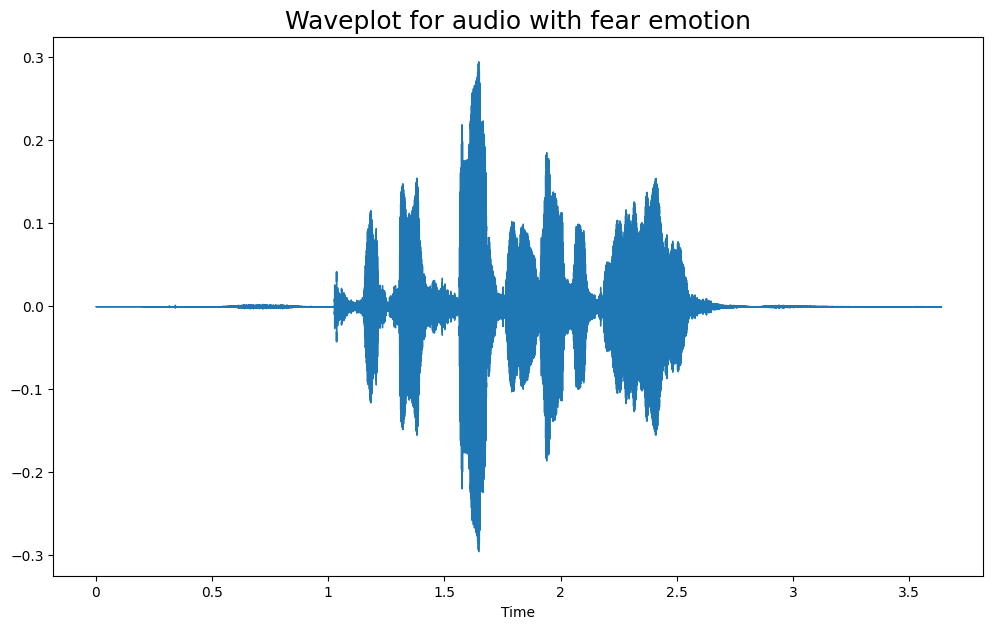

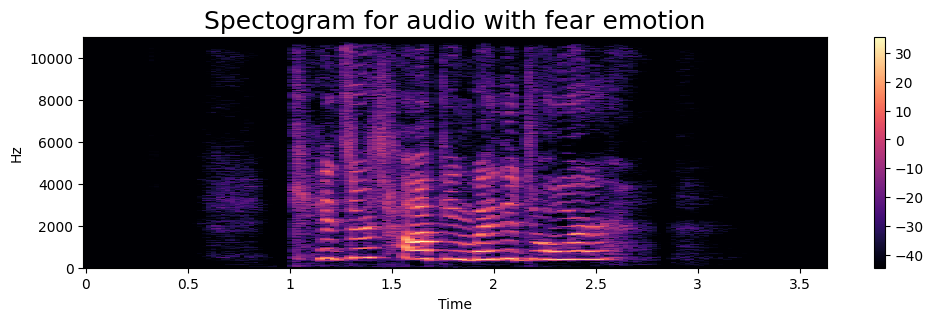

In [14]:
emotion = 'fear'
path = np.array(Ravdess_df.Path[ Ravdess_df.Emotions == emotion])[1]
    # load the audio frame as y and sampling rate as sampling_rate in librosa.load
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

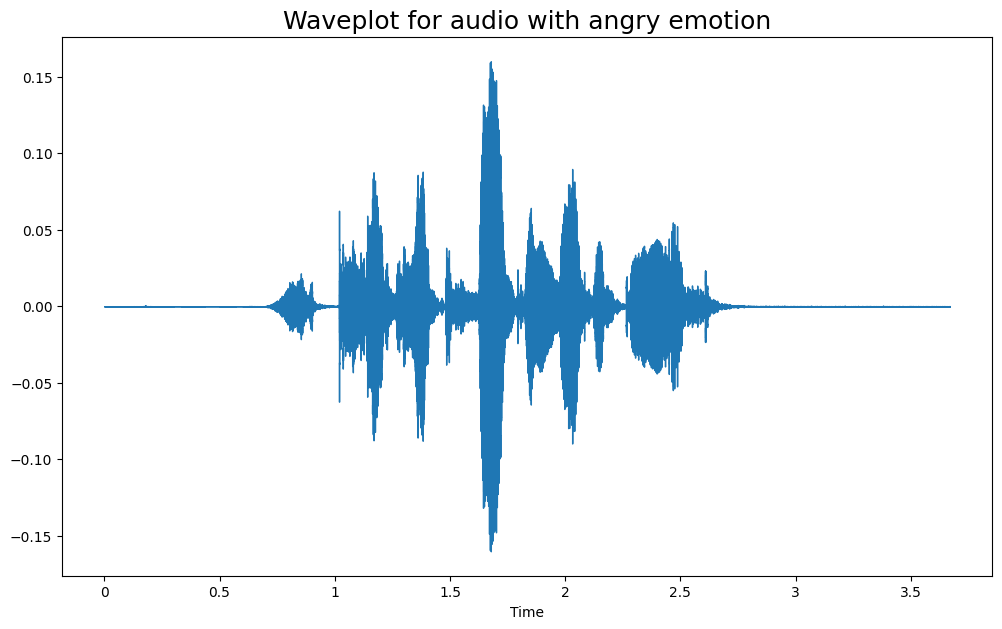

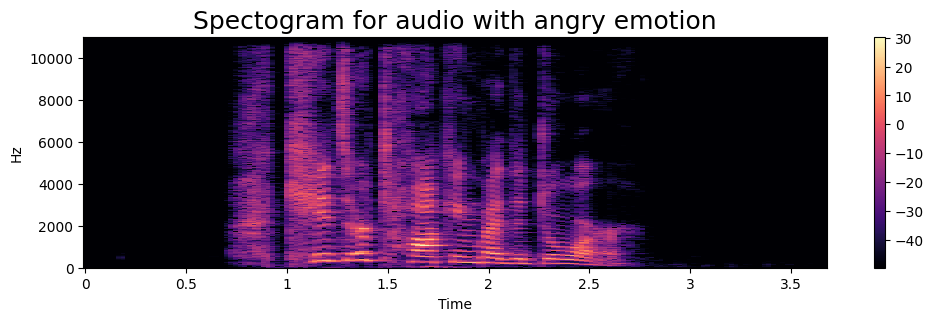

In [15]:
emotion = 'angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions == emotion])[0]
    # load sampling rate as sampling rate and audio features as data
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

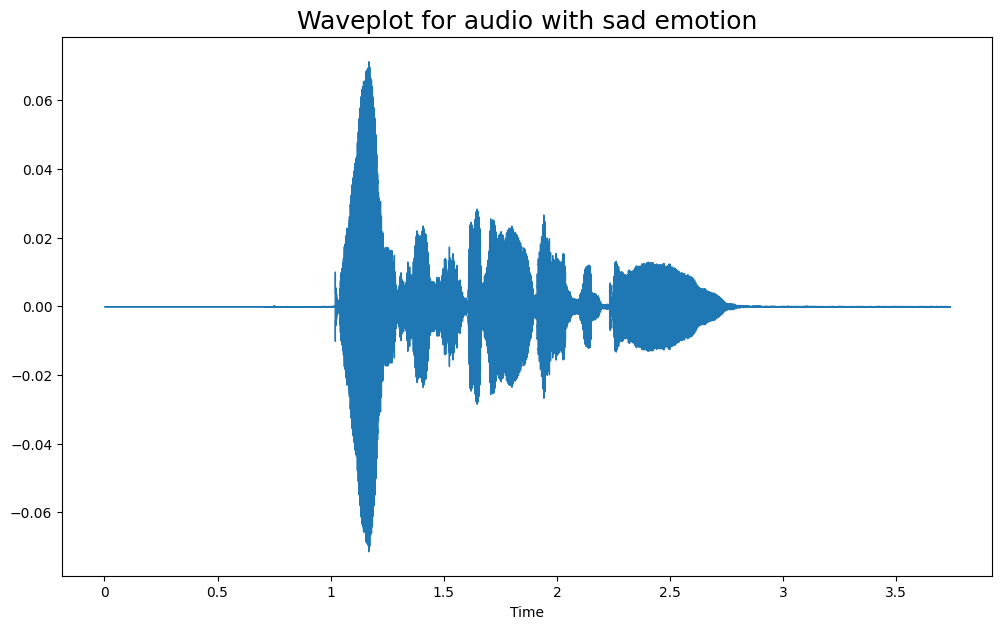

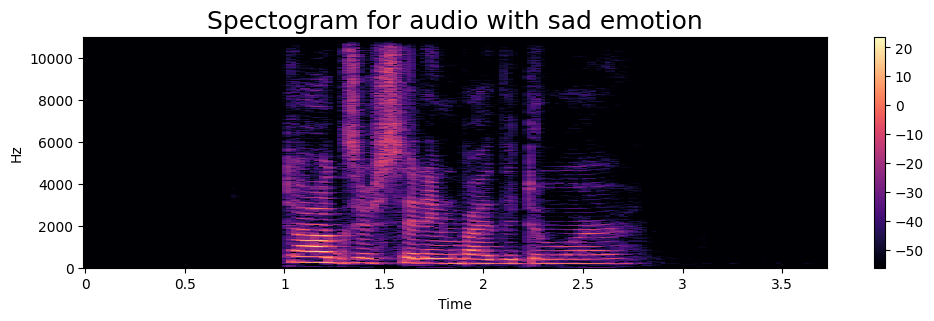

In [16]:
emotion = 'sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

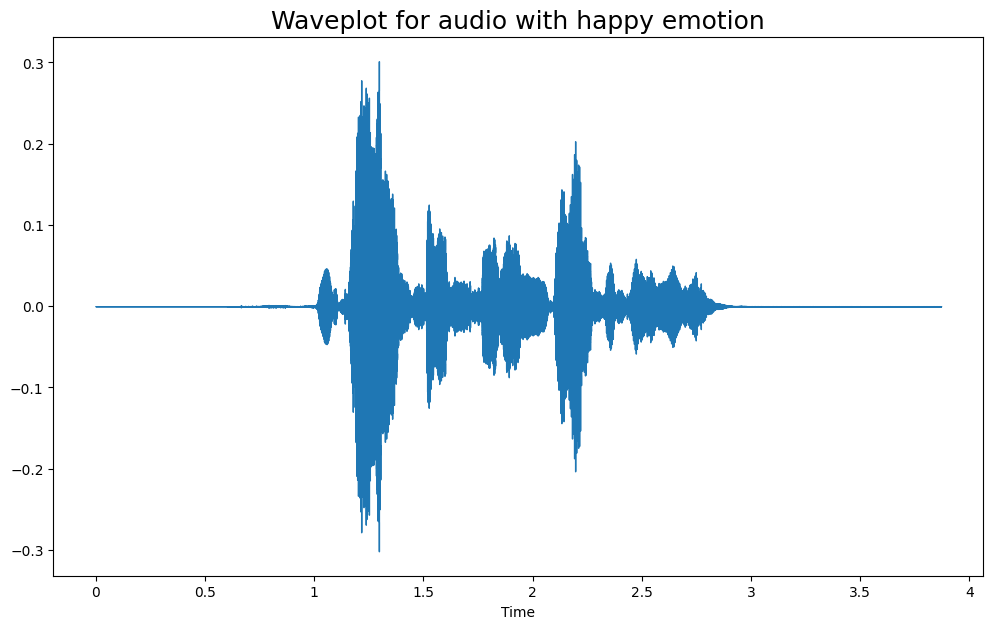

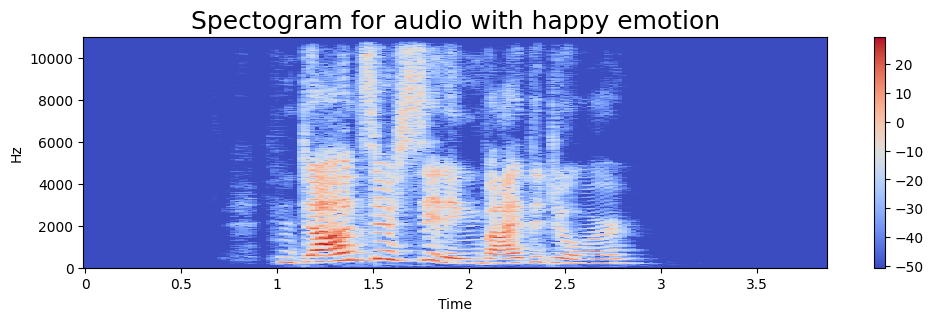

In [17]:
emotion = "happy"
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions == emotion])[4]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

    # Data Augmentation
- Data augmentation is the process by which we create new datasamples by adding small features in our intial training set
- we can use noise injection, shifting time, changing pitch and speed
- why ? Our main objective is to add
    - Adding noise (random or structured)
    - Time stretching (speeding up/slowing down)
    - Pitch shifting (changing the pitch)
    - Shifting in time (rolling the waveform left/right)
Volume changes

let's see which augmentation techniques work in our dataset

In [35]:
def noise(data):
    # uniform would generate a random integer and we will multiply by a maximum value in a given array
    adding_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + adding_amp * np.random.normal(size=data.shape[0])
    return data
    

def stretch(data, rate=0.8):
    # stretching time speeding up/slowing down by  rate 0.8
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=-6)

# taking any example and checking for techniques
path = np.array(Ravdess_df.Path)[1]
data, sample_rate = librosa.load(path)

    #1. simple audio

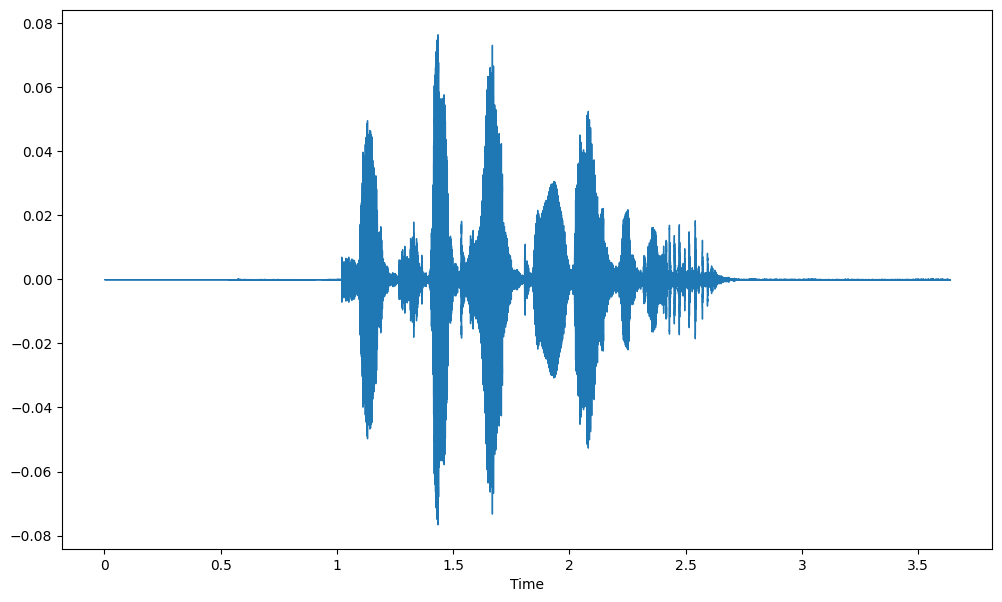

In [22]:
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

    #2. Noise Injection 

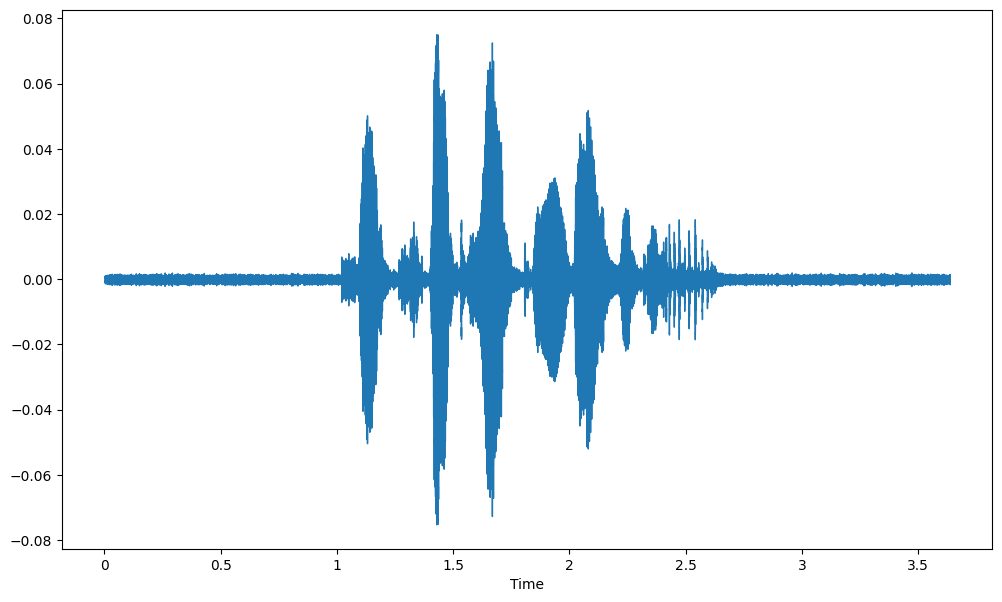

In [21]:
X = noise(data)
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=X, sr=sample_rate)
Audio(X, rate=sample_rate)

    # 3. stretching

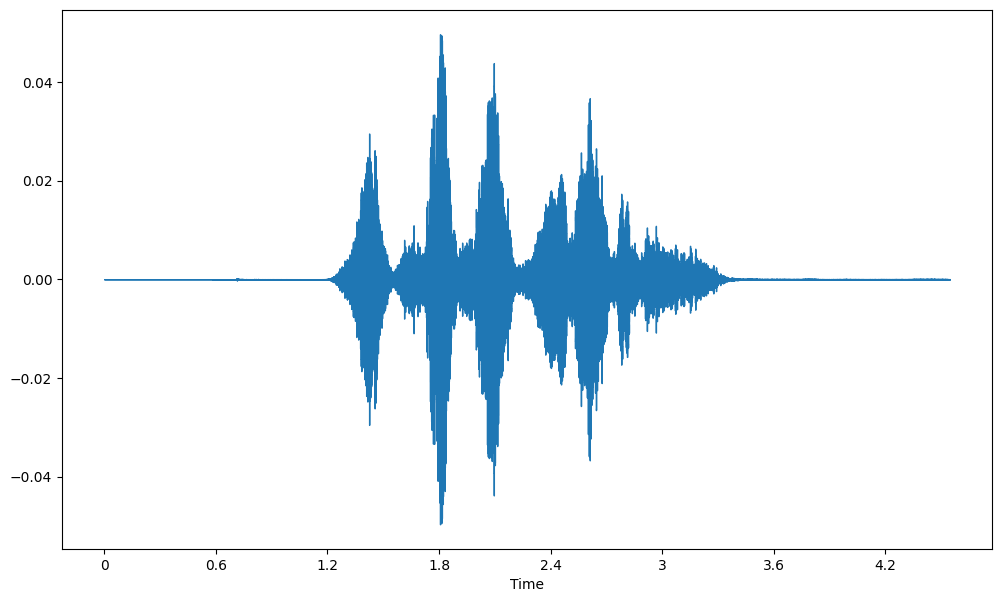

In [36]:
# faced an error
X = stretch(data)
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=X, sr=sampling_rate)
Audio(X, rate=sample_rate)

    # shifting 

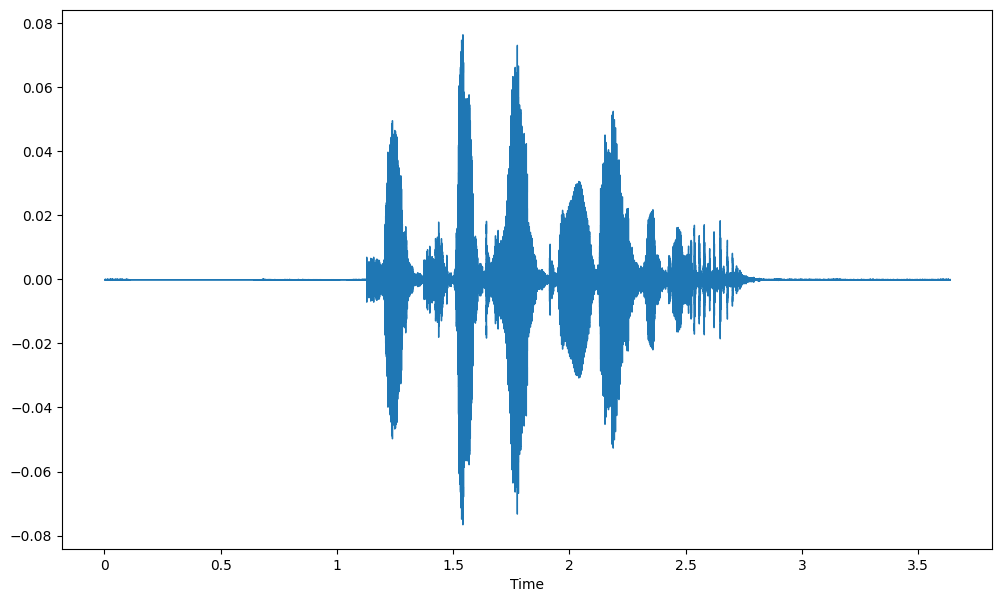

In [30]:
X = shift(data)
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=X, sr=sample_rate)
Audio(X, rate=sample_rate)

    # pitching

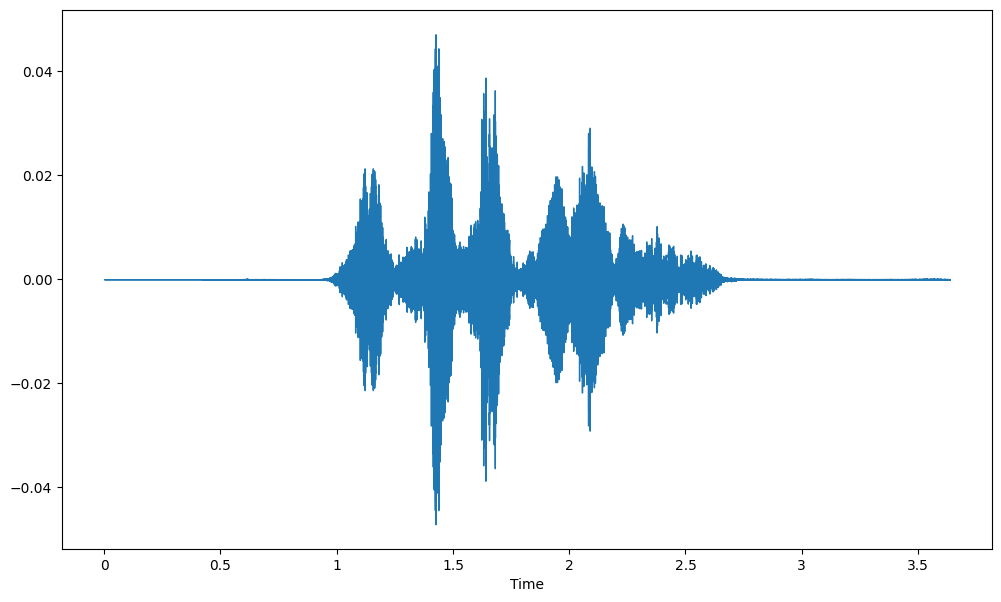

In [34]:
X = pitch(data, sample_rate)
plt.figure(figsize=(12, 7))
librosa.display.waveshow(y=X, sr=sample_rate)
Audio(X, rate=sampling_rate)

    # Feature Extraction 
- extraction of features is a very important in analyzing and finding relations between different frequency of data. we already know that the data provided of audio could not understood by our model directly.
- The audio signal is a three dimensional signal in which three axes represent time, amplitude and frequency.

I need to convert several trannsformations to extract variable features. but I'm not expert in this field. so, I will try to do most easiest features extraction. you can read this blog for more information. https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225 

1. Zero Crossing Rate: it defines how often audio signal switchs from positive to negative(viceversa) in short time
2. energy: the loudness or strength of the signal in a frame
3. entropy of energy: checks if energy changes a lot within small parts of a frame.
4. special centroid: the center of the sound spectrum, like where most of the sound is concentrated.
5. spectral spread: how spread out of the frequencies are around the spectral centroid.
6. special entropy: how evenly the energy is spread across different frequencie
7. spectral flux: how quickly the sound frequencies change over time
8. spectral rollof: the frequency where most of the signal energy(eg: 90%) below that point
9. MFCCs(Mel Frequency Cepstral Coefficients): special numbers that describe the tone of sound using human hearing scale.
10. chroma vector: shows how much energy each of the 12 musical notes like((C, C#, D, etc).


In [38]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [42]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and end of each files as seen above
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching 
    stretch_data = stretch(data)
    pitch_data = pitch(stretch_data, sample_rate)
    res4 = extract_features(pitch_data)
    result = np.vstack((result, res4))
    return result
    

In [46]:
X, y = [], []
for emotions, path in zip(Ravdess_df.Emotions, Ravdess_df.Path):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times 
        y.append(emotions)

In [47]:
len(X), len(y), Ravdess_df.Path.shape

(2160, 2160, (720,))

In [48]:
Features = pd.DataFrame(X)
Features['labels'] = y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.237382  0.682273  0.670519  0.614793  0.579039  0.566803  0.637206   
1  0.335666  0.727894  0.740943  0.745650  0.727258  0.732713  0.743551   
2  0.133225  0.679188  0.687112  0.696194  0.692931  0.719746  0.737756   
3  0.256113  0.621621  0.580278  0.598515  0.628296  0.598015  0.597272   
4  0.313192  0.691988  0.700429  0.713961  0.756230  0.720641  0.670870   

          7         8         9  ...           153           154  \
0  0.667451  0.663883  0.669903  ...  2.335851e-04  2.352573e-04   
1  0.711504  0.689729  0.691516  ...  1.401358e-03  1.427295e-03   
2  0.708146  0.698482  0.655571  ...  2.887689e-15  2.705076e-15   
3  0.650352  0.698636  0.681863  ...  1.834810e-05  1.607061e-05   
4  0.680696  0.725702  0.713518  ...  1.728647e-04  1.610317e-04   

            155           156           157           158           159  \
0  1.379193e-04  1.284234e-04  2.990509e-04  3.595396e-04  2.748132e-04   
1  1.386845e-03  1.332787e-03  1.499695e-03  1.623113e-03  1.463948e-03   
2  2.570011e-15  2.757725e-15  2.522858e-15  2.485086e-15  2.312526e-15   
3  1.274580e-05  1.205306e-05  7.081511e-06  8.285044e-06  8.140660e-06   
4  1.575107e-04  1.591325e-04  1.543722e-04  1.539058e-04  1.515247e-04   

            160           161    labels  
0  1.726744e-04  2.896729e-05  surprise  
1  1.447776e-03  1.361209e-03  surprise  
2  2.236226e-15  2.227285e-15  surprise  
3  5.207213e-06  5.802852e-07   neutral  
4  1.453271e-04  1.353343e-04   neutral  

[5 rows x 163 columns]